## Test 1: import c++ and add a single point
Starting from a single input point.  Store and input from python and plot there. 

In [1]:
import matplotlib.pyplot as plt

def scatter_plot_2d_vectors(vectors):
    x = [vector[0] for vector in vectors]
    y = [vector[1] for vector in vectors]

    plt.scatter(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of 2D Vectors')
    plt.grid(True)
    plt.show()


/home/matthew/Documents/RRT-AR
/home/matthew/anaconda3/envs/RRT-AR/bin/python


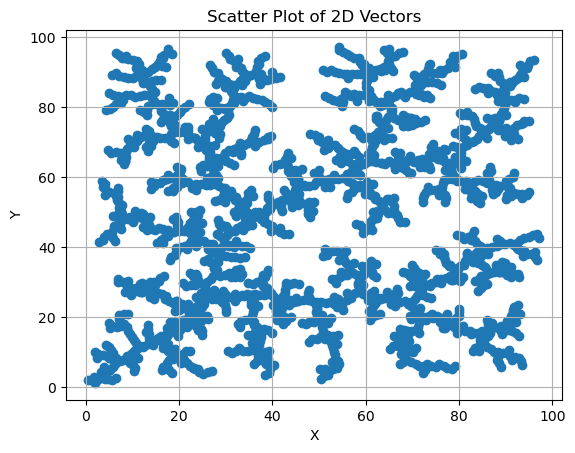

In [7]:
import os
print(os.getcwd())

import sys
print(sys.executable)
sys.path.insert(0, './build')
import RRTAR
scatter_plot_2d_vectors(RRTAR.runRRT(4.0, 4.0, 2000, 1.0))

## Test 2: Tree Plots
Shows the links between nodes

In [ ]:
import matplotlib.pyplot as plt

def tree_plot_2d_vectors(vectors):
    for vector in vectors:
        x = vector[0]
        y = vector[1]
        index = int(vector[2])

        if index >= 0 and index < len(vectors):
            target_vector = vectors[index]
            target_x = target_vector[0]
            target_y = target_vector[1]

            if target_vector[2] >= 0:
                plt.plot([x, target_x], [y, target_y], 'b-')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('RRT Tree plot')
    plt.grid(True)
    plt.show()



In [ ]:
import os
print(os.getcwd())

import sys
print(sys.executable)
sys.path.insert(0, './build')
import RRTAR
tree_plot_2d_vectors(RRTAR.runRRT(4.0, 4.0, 2000, 1.0))

## Misc

In [1]:
import numpy as np
from scipy.spatial import Delaunay

constraints = []
constraints.append(np.array([[20, 50], [20, 150], [40, 150], [40, 50]]))
constraints.append(np.array([[10, 10], [10, 30], [40, 30], [40, 10]]))
yv, xv = np.meshgrid(range(0, 200), range(0, 200))
og = np.zeros_like(xv)

for constraint in constraints:
    hull = Delaunay(constraint)
    ogInner = np.zeros_like(xv)
    len, wid = xv.shape
    for i in range(len):
        for j in range(wid):
            ogInner[i, j] = hull.find_simplex([xv[i,j],yv[i,j]])


    og[ogInner != -1] = 1


In [3]:
from ctypes import CDLL

# Load the shared library
lib = CDLL('./RRT-AR.so')

# Call the C++ function
result = lib.mult_numbers(3, 4)
print("Result:", result)

AttributeError: ./RRT-AR.so: undefined symbol: mult_numbers